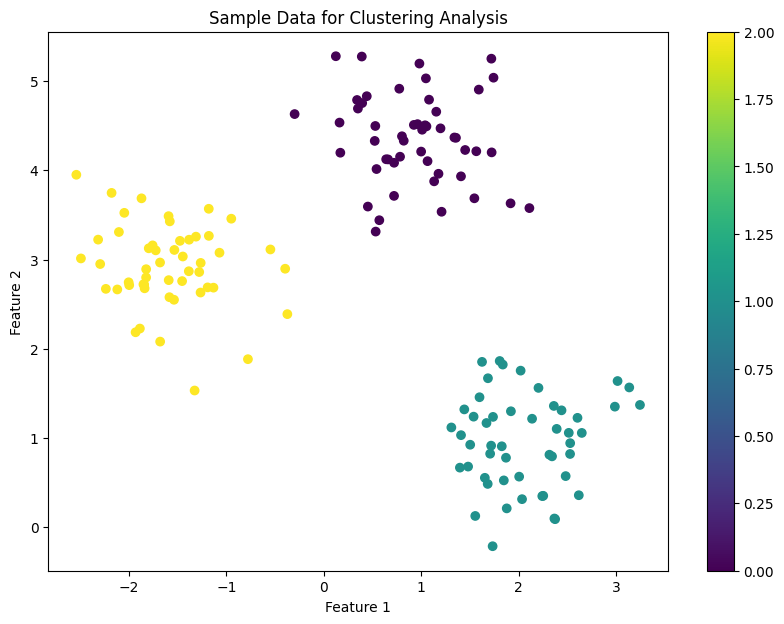

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create sample data
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

# Plot the data
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter)
plt.title('Sample Data for Clustering Analysis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

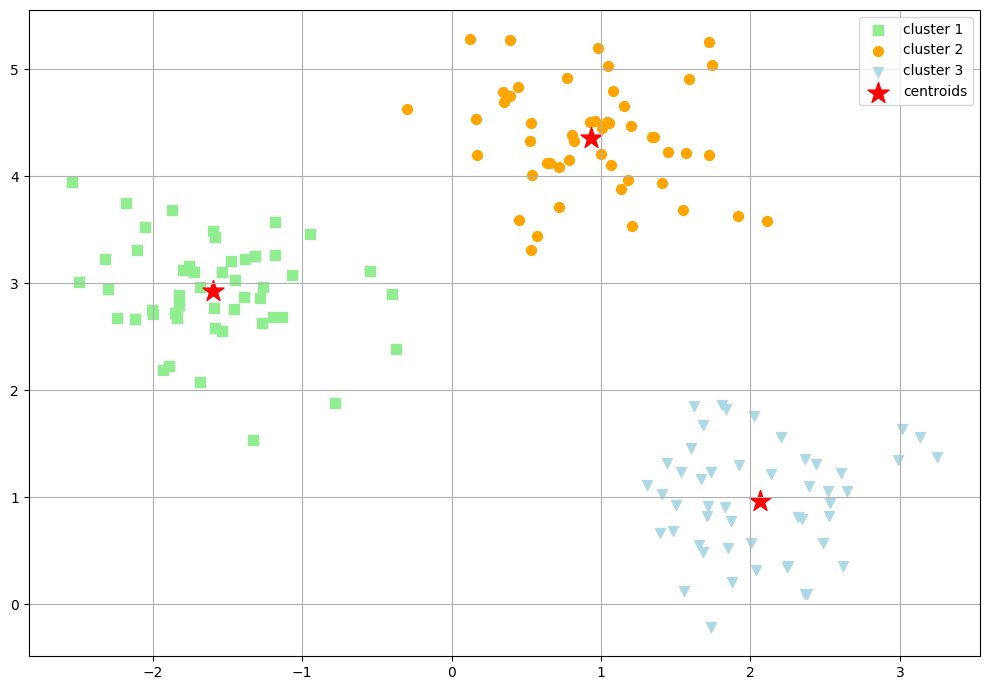

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, # run kmeans 10 times independently
            max_iter=300,  # max num of iterations for each run
            tol=1e-04, # tolerance for stopping criterion
            random_state=0)

y_km = km.fit_predict(X)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[y_km == 0, 0],
                      X[y_km == 0, 1],
                      s=50,
                      c='lightgreen',
                      marker='s',
                      label='cluster 1')
scatter = plt.scatter(X[y_km == 1, 0],
                      X[y_km == 1, 1],
                      s=50,
                      c='orange',
                      marker='o',
                      label='cluster 2')
scatter = plt.scatter(X[y_km == 2, 0],
                      X[y_km == 2, 1],
                      s=50,
                      c='lightblue',
                      marker='v',
                      label='cluster 3')
scatter = plt.scatter(km.cluster_centers_[:, 0],
                      km.cluster_centers_[:, 1],
                      s=250,
                      marker='*',
                      c='red',
                      label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# Elbow Method

In [3]:
print(km.inertia_)

72.476016709967


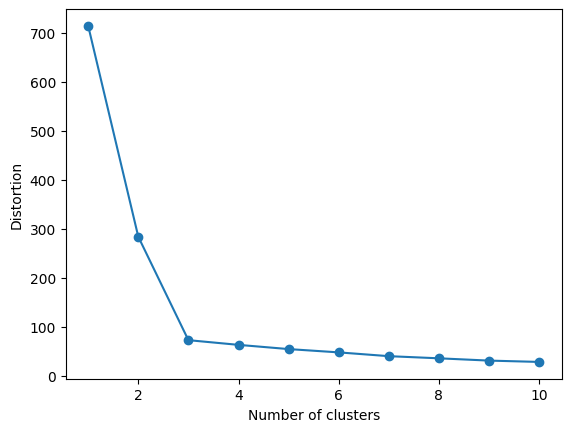

In [4]:
distortions = []
for i in range (1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Silhouette Method

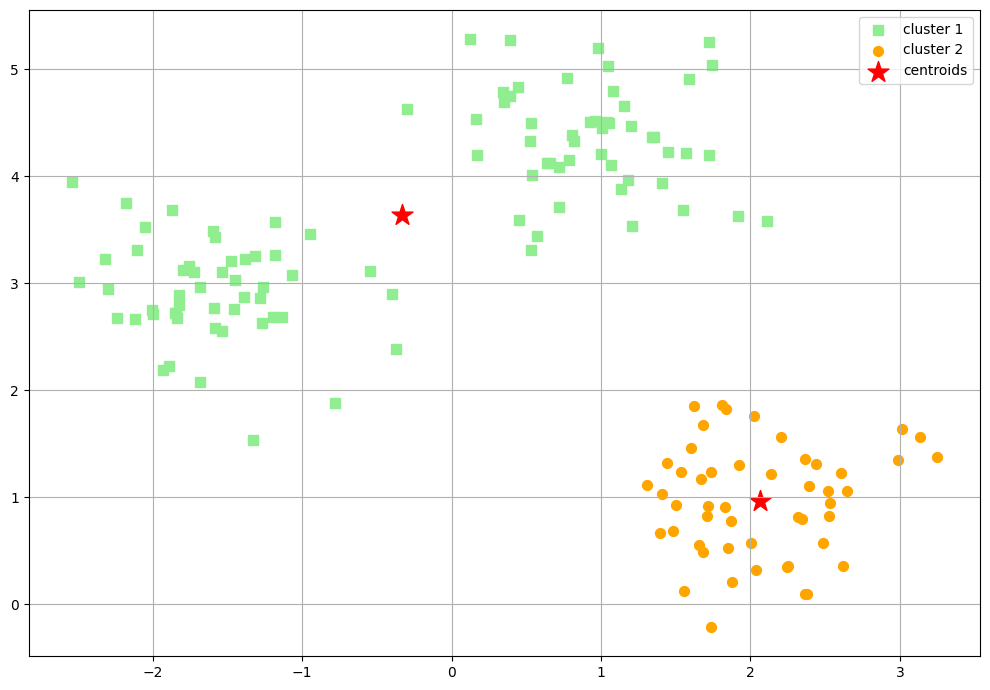

In [5]:
km = KMeans(n_clusters=2, 
            init='k-means++',
            n_init=10,
            tol=1e-04,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(X)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(X[y_km == 0, 0],
                      X[y_km == 0, 1],
                      s=50,
                      c='lightgreen',
                      marker='s',
                      label='cluster 1')
scatter = plt.scatter(X[y_km == 1, 0],
                      X[y_km == 1, 1],
                      s=50,
                      c='orange',
                      marker='o',
                      label='cluster 2')
scatter = plt.scatter(km.cluster_centers_[:, 0],
                      km.cluster_centers_[:, 1],
                      s=250,
                      marker='*',
                      c='red',
                      label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# Hierarchical Clustering

In [7]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID0', 'ID1', 'ID2', 'ID3', 'ID4']

X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID0,6.964692,2.861393,2.268515
ID1,5.513148,7.194690,4.231065
ID2,9.807642,6.848297,4.809319
ID3,3.921175,3.431780,7.290497
ID4,4.385722,0.596779,3.980443


Calculate pair-wise Euclidean distances between observations in a dataset.

In [8]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID0,ID1,ID2,ID3,ID4
ID0,0.000000,4.973534,5.516653,5.899885,3.835396
ID1,4.973534,0.000000,4.347073,5.104311,6.698233
ID2,5.516653,4.347073,0.000000,7.244262,8.316594
ID3,5.899885,5.104311,7.244262,0.000000,4.382864
ID4,3.835396,6.698233,8.316594,4.382864,0.000000


In [9]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_clusters

array([[0.        , 4.        , 3.83539555, 2.        ],
       [1.        , 2.        , 4.34707339, 2.        ],
       [3.        , 5.        , 5.89988504, 3.        ],
       [6.        , 7.        , 8.31659367, 5.        ]])

In [10]:
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


['ID0', 'ID1', 'ID2', 'ID3', 'ID4']

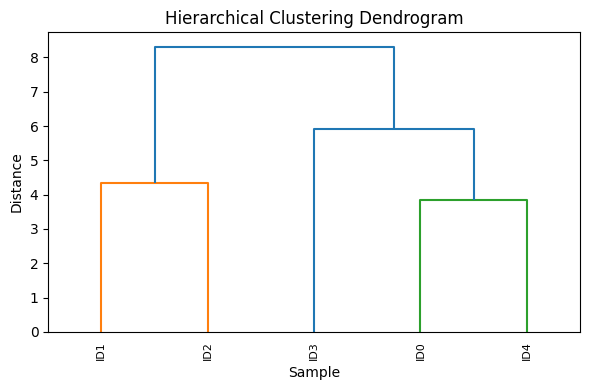

In [17]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Use the existing row_clusters and labels
plt.figure(figsize=(6, 4))
dendrogram(row_clusters,
           labels=labels,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

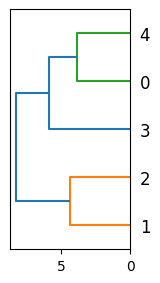

C:\Users\lived\AppData\Local\Temp\ipykernel_15008\1505569122.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_xticklabels([''] + list(df_rowclust.columns))
C:\Users\lived\AppData\Local\Temp\ipykernel_15008\1505569122.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axm.set_yticklabels([''] + list(df_rowclust.index))


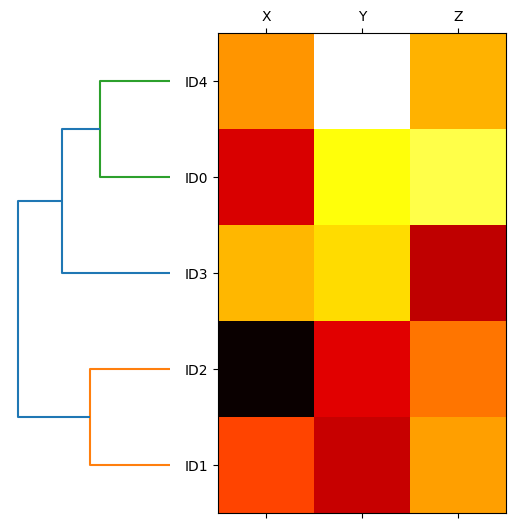

In [24]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)

axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

Scikit-learn

In [26]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
labels = ac.fit_predict(df)
labels

array([1, 0, 0, 2, 1], dtype=int64)

# DBSCAN

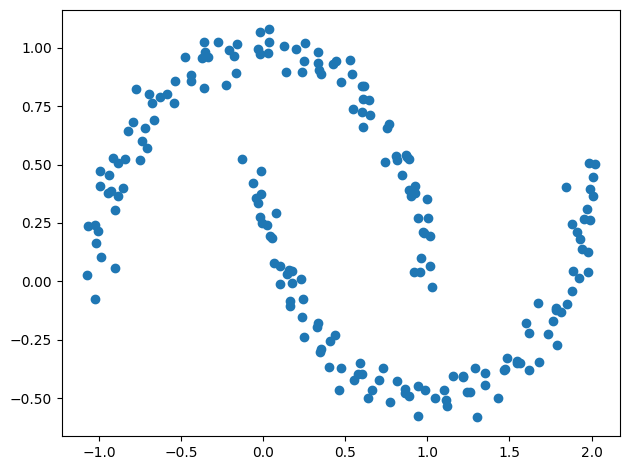

In [27]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

K-means and agglometive clustering

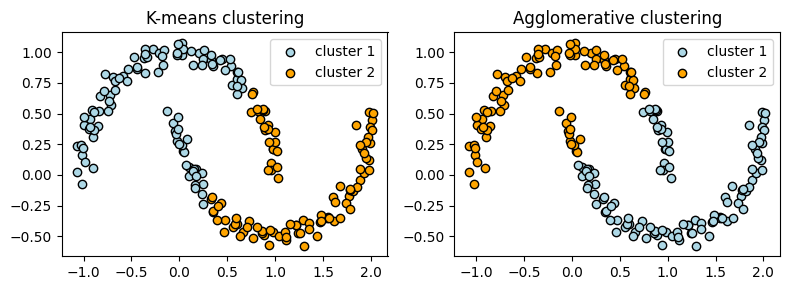

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue',
            label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='orange',
            label='cluster 2')
ax1.set_title('K-means clustering')
ax1.legend()

ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1],
            edgecolor='black',
            c='lightblue',
            label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1],
            edgecolor='black',
            c='orange',
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
ax2.legend()
plt.tight_layout()
plt.show()

DBSCAN

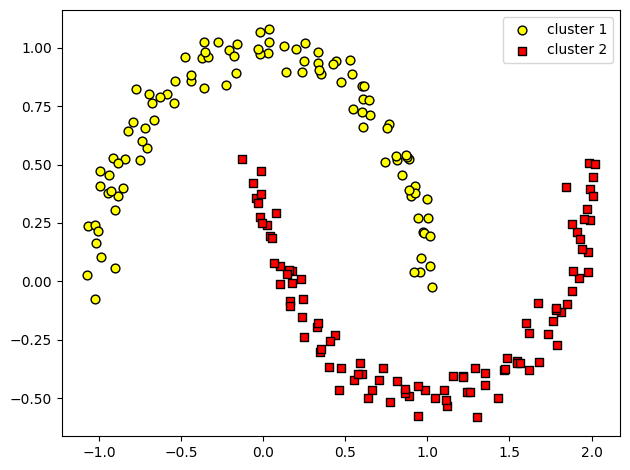

In [33]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='yellow', marker='o', edgecolors='black',
            s=40, label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', edgecolors='black',
            s=40, label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()